# Naïve Bayes Classifier 
is probabilistic supervised machine learning algorithms. It is used to solve classification problem.

It is based on Bayes Theorem.


Here we are going to implement the Naive Bayes Classifier to predict Breast Cancer.

Will be using the dataset from sklearn. So lets get started with it.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Model specific Library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Load Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [3]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

So we see that we have loaded the breast cancer dataset.. but this does not looks like a dataset... yes, this is complete detail along with the dataset.

Actually this detail is in dictionary format, we can get the keys from this dictionary using `key`.

In [4]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

So we see that we do have `data`,`feature_names`, `target`, `target_names` and others as well, but will be focusing on these. If interested please do and read the other details.

In [5]:
breast_cancer.data
# This is our actual data.

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
# These are the feature names for our dataset (data)
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# These are our target data
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

This represent the string format of our target / class.

So in target if value is 0 it means it is `malignant` ie the patient is suffering with malignant tumor.

Where as `benign` is represented by 1, and the patient is not having any cancer.

# Create Dataframe 
Create dataframe out of the keys which are intreset to us.

In [9]:
df = pd.DataFrame(
    np.c_[breast_cancer.data, breast_cancer.target], 
    columns = [list(breast_cancer.feature_names)+ ['target']]
                 )

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
# what is the shape of the data
# put your code here

(569, 31)

In [11]:
# how to describe the data
# note this is a very informative function that is only available in pandas
# put your code here
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# how do you exam the non-null values
# check whether there are any null values


print(df.isnull().any(axis=1).sum())

0


In [13]:
# another way to check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

# Split the data into X and y

In [14]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

#X = df.iloc[:, 0:-1]
#y = df.iloc[:,-1]

In [15]:
X.shape, y.shape

((569, 30), (569,))

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)
# remember that the random state is important for reproducibility

In [17]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((455, 30), (455,), (114, 30), (114,))

# Train Naive Bayes Classifier Model

## Gaussian Naive Bayes

In [18]:
clf = GaussianNB()

In [19]:
clf.fit(X_train, y_train)

GaussianNB()

In [20]:
clf.score(X_val, y_val)

0.9210526315789473

wow... congrats!! We have achieved 92% at the first go.

moving onto another type of Naive Bayes 

## Multinomial Naive Bayes

In [21]:
clf_mn = MultinomialNB()

In [22]:
clf_mn.fit(X_train, y_train)

MultinomialNB()

In [23]:
clf_mn.score(X_val, y_val)

0.8421052631578947

Score goes down when compared to Gaussian NB.

Lets see the 3rd type as well.

## Bernoulli Naive Bayes

In [24]:
clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
clf_b.score(X_val, y_val)

0.5526315789473685

Ohh... this gets score much worst.

But dont worry... as we were having Numerical Data, so Guassian NB works best for this.. where as when we have any text dataset then using Multinomial or Bernoulli NB works best.

# Predict

To predict this, lets create our own data to test this.
But as we are not Medical person, so we will jsut do a copy paste any one or two records from our train dataset, and do some change in it.

The `display.max_columns` option controls the number of columns to be printed. It receives an int or None (to print all the columns):

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
# print(df.iloc[99])
df[99:100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
99,14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353,0.0


In [27]:
patient1 = [14.42,19.77,94.48,642.5,0.09752,0.1141,0.09388,0.05839,0.1879,0.0639,0.2895,1.851,2.376,26.85,0.008005,0.02895,0.03321,0.01424,0.01462,0.004452,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353]
patient1

[14.42,
 19.77,
 94.48,
 642.5,
 0.09752,
 0.1141,
 0.09388,
 0.05839,
 0.1879,
 0.0639,
 0.2895,
 1.851,
 2.376,
 26.85,
 0.008005,
 0.02895,
 0.03321,
 0.01424,
 0.01462,
 0.004452,
 16.33,
 30.86,
 109.5,
 826.4,
 0.1431,
 0.3026,
 0.3194,
 0.1565,
 0.2718,
 0.09353]

Need to convert the patient1 dataset into 2-Dimension.

In [28]:
patient1 = np.array([patient1])
patient1

array([[1.442e+01, 1.977e+01, 9.448e+01, 6.425e+02, 9.752e-02, 1.141e-01,
        9.388e-02, 5.839e-02, 1.879e-01, 6.390e-02, 2.895e-01, 1.851e+00,
        2.376e+00, 2.685e+01, 8.005e-03, 2.895e-02, 3.321e-02, 1.424e-02,
        1.462e-02, 4.452e-03, 1.633e+01, 3.086e+01, 1.095e+02, 8.264e+02,
        1.431e-01, 3.026e-01, 3.194e-01, 1.565e-01, 2.718e-01, 9.353e-02]])

In [29]:
clf.predict(patient1)

array([1.])

In [30]:
pred = clf.predict(patient1)

if pred[0] == 0:
    print("Patient is suffering from Cancer (Malignant Tumor)")
else:
    print("Patient has no Cancer (Benign)")

Patient has no Cancer (Benign)


# Probability
Lets see the probability of the prediction.

In [31]:
pred_prob = clf.predict_proba(patient1)
pred_prob

array([[0.01172633, 0.98827367]])

In [32]:
pred_prob.ndim

2

In [33]:
pred_prob[0]

array([0.01172633, 0.98827367])

# Visualize it

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# get the top 10 features based on the model
feature_importance = clf.theta_[1]
print(feature_importance)


[1.21646701e+01 1.78847619e+01 7.81940816e+01 4.64317007e+02
 9.18892517e-02 7.94938776e-02 4.68257167e-02 2.55242415e-02
 1.73828912e-01 6.27650680e-02 2.85669728e-01 1.22525986e+00
 2.01191224e+00 2.11896803e+01 7.11176871e-03 2.18275442e-02
 2.68664170e-02 9.96696599e-03 2.05262891e-02 3.66636837e-03
 1.34060238e+01 2.35153401e+01 8.71839116e+01 5.61004082e+02
 1.24130714e-01 1.83763605e-01 1.69382065e-01 7.47674524e-02
 2.69818027e-01 7.93489456e-02]


Text(0.5, 1.0, 'Top 5 Features')

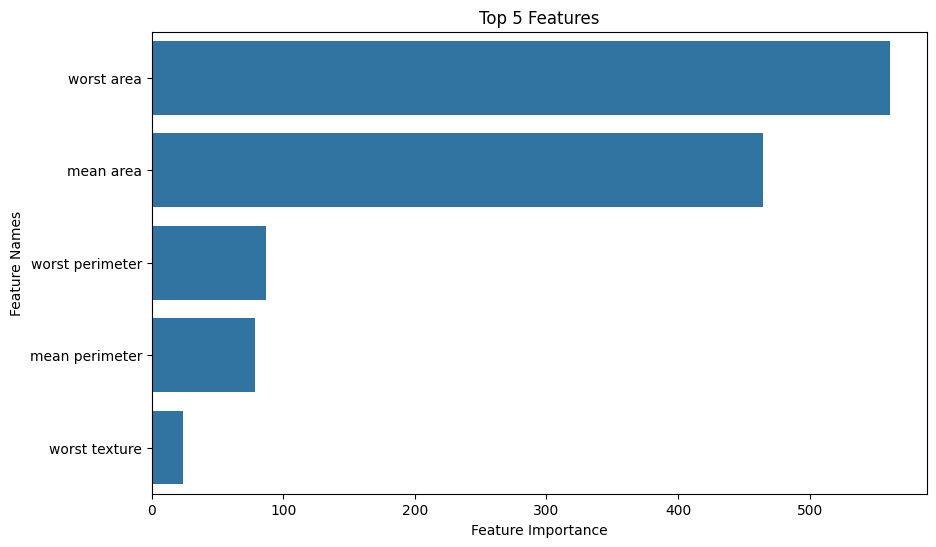

In [36]:
# feature_importance plot
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
# show the top 5 features
zip_data = zip(breast_cancer.feature_names, feature_importance)
zip_data = sorted(zip_data, key = lambda x: x[1], reverse = True)
feature_names, feature_importance = zip(*zip_data)
sns.barplot(x = list(feature_importance)[:5], y = list(feature_names)[:5])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 5 Features')


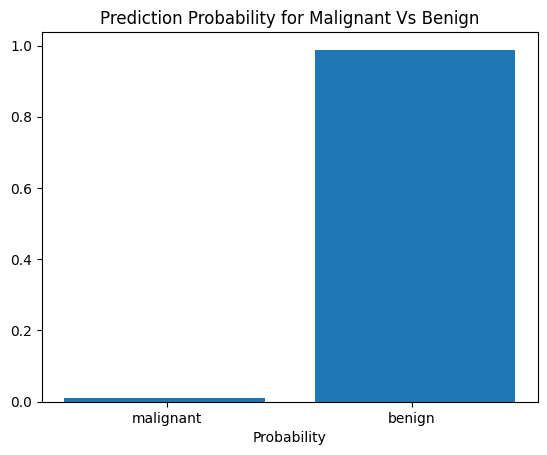

In [37]:

plt.bar(breast_cancer.target_names, pred_prob[0])
plt.title('Prediction Probability for Malignant Vs Benign')
plt.xlabel('Probability')
plt.xticks(pred_prob[0])
# plt.ylabel('y') 
plt.show()



<Axes: >

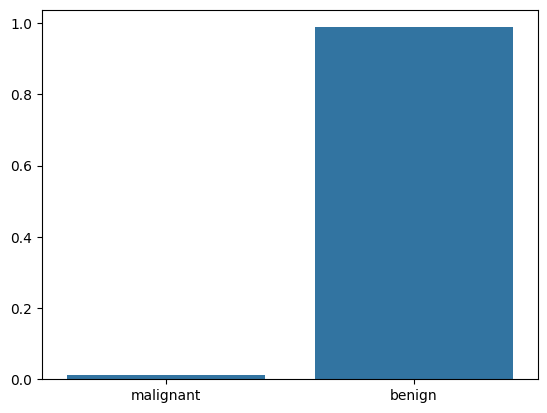

In [38]:
sns.barplot(y = pred_prob[0], x = breast_cancer.target_names)


Annotate the values

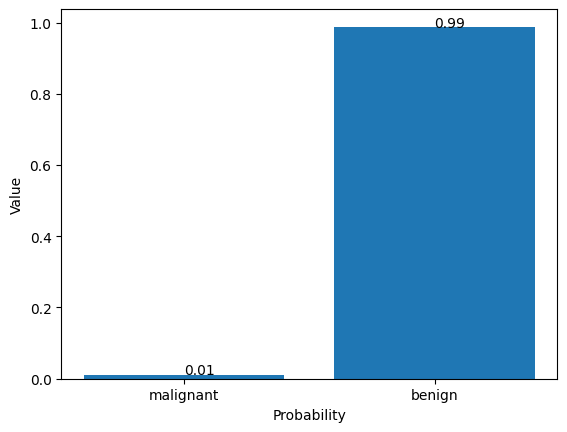

In [39]:
line = plt.bar(breast_cancer.target_names,pred_prob[0])
plt.xlabel('Probability')
plt.ylabel("Value")

for i in range(2):
    plt.annotate(str(round(pred_prob[0][i],2)), xy=(breast_cancer.target_names[i],pred_prob[0][i]))

plt.show()

In [40]:
worst_area

NameError: name 'worst_area' is not defined

In [41]:
# permutate the worst area feature
# bin 10 worst area values from the max value to the min value
# predict the probability of the patient having cancer

worst_area = X_train['worst area'].values
# 10 bins
max_worst_area = max(worst_area)
min_worst_area = min(worst_area)
bins = np.linspace(min_worst_area, max_worst_area, 10)


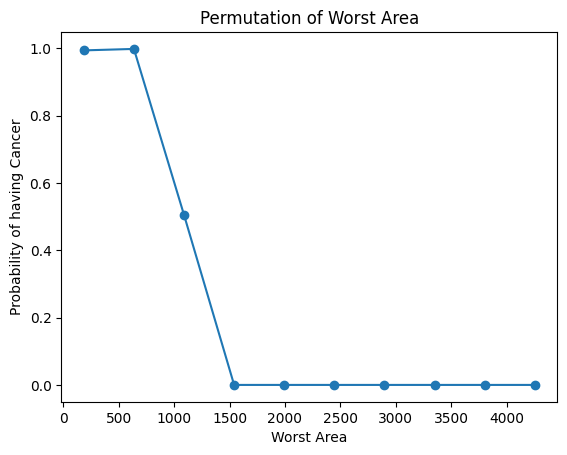

In [42]:
# use the feature to permutate the patient 1 data
import numpy as np
permutated_patient1 = patient1.copy()
# worse area index

worst_area_index =list( X.columns.get_loc('worst area')).index(True)
# get the index number of worst area

# permutate patient1 
prob_list = []
class_list = []
for i in range(10):
    permutated_patient1[0][worst_area_index] = bins[i]
    prob_list.append(clf.predict_proba(permutated_patient1)[0][1])
    class_list.append(clf.predict(permutated_patient1)[0])
# plot the permutated patient1 based on the worst area
plt.plot(bins, prob_list)
plt.scatter(bins, prob_list, )
plt.xlabel('Worst Area')
plt.ylabel('Probability of having Cancer')
plt.title('Permutation of Worst Area')
plt.show()


# Workshop: Naïve Bayes for Breast Cancer Prediction

Welcome to this workshop! In this session, we will explore Naive Bayes classifiers, 
understanding their theoretical foundation, and applying them to predict breast cancer using a popular dataset.

## Learning Objectives:
- Understand the principles of Naive Bayes classification.
- Differentiate between Gaussian, Multinomial, and Bernoulli Naive Bayes models.
- Learn how to implement and evaluate Naive Bayes models in Python using scikit-learn.
- Practice hands-on exercises to solidify your understanding.

## Agenda:
1. **Introduction to Naive Bayes**: Overview and assumptions.
2. **Data Exploration**: Understanding the breast cancer dataset.
3. **Model Implementation**: GaussianNB, MultinomialNB, BernoulliNB.
4. **Model Evaluation**: Confusion matrix, precision, recall, F1-score, ROC curves.
5. **Interactive Exercises**: Modify code, test understanding, explore different datasets.
6. **Summary and Q&A**.



# Naive Bayes Classifier Overview

Naive Bayes is a probabilistic classifier based on Bayes' Theorem. It is simple, yet effective for certain types of classification problems.
It assumes that features are independent of each other, which is often not true in reality, but the model still performs well in many cases.

### Types of Naive Bayes Classifiers
1. **GaussianNB**: Assumes that the features follow a normal distribution. Suitable for continuous features.
2. **MultinomialNB**: Used for discrete features like counts (e.g., word counts in a text classification problem).
3. **BernoulliNB**: Suitable for binary/Boolean features (0 or 1).

In this workshop, we will explore all three types and understand their differences.


# Data Exploration
Let's start by loading and exploring the breast cancer dataset.

In [ ]:

# Load the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display first few rows
df.head()



### Dataset Description
The dataset consists of several features about the characteristics of cell nuclei present in breast cancer tumors. 
The target variable represents whether the tumor is **malignant** (coded as 0) or **benign** (coded as 1).

Now, let's explore the dataset through some basic statistics and visualizations.


In [ ]:

# Show basic statistics and class distribution
df.describe()
df['target'].value_counts()


In [ ]:

# Visualize the class distribution and pairplot for some features
sns.countplot(x='target', data=df)
plt.show()

# Visualize relationships between features using pairplot (optional: limit to a few features for speed)
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], hue='target')
plt.show()



# Naive Bayes Model Implementation

We will now implement and compare three types of Naive Bayes classifiers: **GaussianNB**, **MultinomialNB**, and **BernoulliNB**.
The dataset we're using has continuous features, so **GaussianNB** is most appropriate, but we'll explore all types.

### 1. GaussianNB Implementation


In [ ]:

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.3, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Gaussian Naive Bayes")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



### 2. MultinomialNB Implementation

Although **MultinomialNB** is typically used for discrete features, we will apply it here to demonstrate the process.


In [ ]:

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions
y_pred_mnb = mnb.predict(X_test)

# Evaluate the model
print("Multinomial Naive Bayes")
print(confusion_matrix(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))



### 3. BernoulliNB Implementation

**BernoulliNB** is used for binary features, so it might not be appropriate for this dataset, but we will implement it to complete the comparison.


In [ ]:

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions
y_pred_bnb = bnb.predict(X_test)

# Evaluate the model
print("Bernoulli Naive Bayes")
print(confusion_matrix(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))



# Model Evaluation

Let's compare the performance of the three models. We'll also visualize some important metrics like ROC curves.


In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC AUC for GaussianNB
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_prob_gnb)

# Plot ROC curve for GaussianNB
plt.figure()
plt.plot(fpr_gnb, tpr_gnb, label=f'GaussianNB (area = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GaussianNB')
plt.legend(loc="lower right")
plt.show()



# Interactive Exercise

Now it's your turn! Try the following:
- Modify the code to split the dataset differently or try different preprocessing techniques.
- Change hyperparameters and evaluate their effect on the model performance.
- Try using another dataset from `sklearn` and apply Naive Bayes to it.



# Summary and Q&A

In this workshop, we learned how to implement and evaluate different types of Naive Bayes classifiers using scikit-learn. 
We explored the **GaussianNB**, **MultinomialNB**, and **BernoulliNB** models and applied them to the breast cancer dataset.

Feel free to ask questions or experiment further with the code!
